<left> <font size=5 style='font-family:Courier New' color='Blue' > **Project 8 - Convolutional Neural Networks (Computer Vision):** 
<left> <font size=5 style='font-family:Courier New' color='Green' > **Plants Seeding Classification** 

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
classifying the Plant Seedlings into their respective 12 Categories...

<left> <font size=6 style='font-family:Courier New' color='Orange' > **List of Plant Species:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Black-grass
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Charlock
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Cleavers
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Common Chickweed
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Common Wheat
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Fat Hen
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Loose Silky-bent
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Maize
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Scentless Mayweed
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Shepherds Purse
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Small-flowered Cranesbill
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Sugar beet

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Case Understanding:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Multi-class classification peoblem where a Dataset of 4,750 plant images is divided into Numpy Arrays of 3 channels (Colored Images) on 'npy' file along with corresponding Labels on a separate 'csv' file.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> Initially, we may have some worries about the structure of our dataset; Although the Dataset size is considered somehow fair enough, the No. of classes is large which needs a careful treatment to avoid ending with low accuracy model.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> As in any CNN Problem, Images quality plays a crucial role in having robust and well generalized model that is able to correctly classify the objects with minimum errors.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> In order to achieve the above, we will start by viewing the data, making sure that its well labeled, spending some time on processing it in order to make it ready for modelling, and finally building the appropriate CNN Model and tune it if neccessary to achieve the best possible performance.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **1. Prework:**  

In [2]:
# Data Reading and Manipulating Libraries:
import pandas as pd 
import numpy as np 
from numpy import asarray
import random

# Python Image Library:
import PIL
from PIL import Image

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
%matplotlib inline
sns.set()
sns.set_style(style = 'darkgrid')

# SKLearn Library:
from sklearn import metrics
from sklearn.model_selection import (train_test_split , KFold , StratifiedKFold , cross_val_score ,
                                     GridSearchCV , RandomizedSearchCV)
from sklearn.metrics import (f1_score , accuracy_score , recall_score , precision_score , confusion_matrix , 
                             roc_auc_score , precision_recall_curve , roc_curve , classification_report , r2_score , 
                             mean_squared_error , mean_absolute_error)
from sklearn.impute import (SimpleImputer , KNNImputer)
from sklearn.preprocessing import (FunctionTransformer , LabelEncoder , OneHotEncoder , KBinsDiscretizer , 
                                   StandardScaler , MinMaxScaler , LabelBinarizer)
from sklearn.linear_model import Ridge , Lasso

# ImbLearn Library:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Scipy Library:
from scipy.spatial.distance import cdist , pdist

# Suppressing Version Warnings:
import warnings
warnings.filterwarnings("ignore")

# Time Library:
import time

# Computer Vision Library:
import cv2

# Keras Library:
import keras
from keras import (callbacks , initializers , regularizers)

# Operating System:
import os

# Tensorflow Library:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import (EarlyStopping , ModelCheckpoint , ReduceLROnPlateau)
from tensorflow.keras import (losses , backend , optimizers , Sequential)
from tensorflow.keras.layers import (Dense , Input , Dropout , BatchNormalization , Conv2D , Flatten ,
                                     AveragePooling2D , MaxPooling2D , Activation , LeakyReLU)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import (Sequential , Model)
from keras.preprocessing.image import (ImageDataGenerator ,img_to_array , load_img)
from tensorflow.keras.optimizers import (Adam , SGD , RMSprop)

# Transfer Learning Libraries:
# from keras.applications.vgg16 import VGG16

In [3]:
# Loading the Images 'npy file' and Labels 'csv file' then assign them to Variables:

images = np.load('Project_08_ConvolutionalNeuralNetworks_PlantSeedlings_Dataset_Images.npy')
labels = pd.read_csv('Project_08_ConvolutionalNeuralNetworks_PlantSeedlings_Dataset_Labels.csv')

<left> <font size=6 style='font-family:Courier New' color='Orange' > **2. Dataset Overview:**  

In [4]:
# Checking the File Types of the Dataset:

print('\033[0m' , '\033[92m' , 'Images are stored as: ' , 
  '\033[1m' , '\033[91m' , type(images) , sep='')

print('\033[0m' , '\033[92m' , 'Labels are stored as: ' , 
  '\033[1m' , '\033[91m' , type(labels) , sep='')

Images are stored as: <class 'numpy.ndarray'>
Labels are stored as: <class 'pandas.core.frame.DataFrame'>


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Images are stored inside npy file as Numpy Arrays.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Labels are stored inside csv file as Dataframe.

In [5]:
# Checking the Shapes of the Dataset:

print('\033[0m' , '\033[92m' , 'Images File Shape is: ' , 
  '\033[1m' , '\033[91m' , images.shape , sep='')

print('\033[0m' , '\033[92m' , 'Labels File Shape is: ' , 
  '\033[1m' , '\033[91m' , labels.shape , sep='')

Images File Shape is: (4750, 128, 128, 3)
Labels File Shape is: (4750, 1)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Dataset contains 4,750 Samples/Images with Dimensions = 128x128 (HeightxWidth) and Channels/Depth = 3 represented as a 3D Arrays in NPY File.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Dataset contains 4,750 Labels/Data Rows represented as a 2D Arrays in CSV File.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Since No. of Samples/Images = No. of Labels, then the Dataset is consistent and has no abnormality indicators.

In [6]:
# Viewing the Pixel Map of a Random Image:

images[10]

array([[[ 48,  57,  67],
        [ 49,  57,  67],
        [ 39,  46,  56],
        ...,
        [ 40,  66,  98],
        [ 52,  77, 104],
        [ 52,  80, 106]],

       [[ 55,  63,  72],
        [ 68,  73,  82],
        [ 40,  45,  54],
        ...,
        [ 44,  70, 101],
        [ 52,  78, 105],
        [ 57,  85, 110]],

       [[ 48,  54,  64],
        [ 46,  52,  60],
        [ 37,  42,  52],
        ...,
        [ 38,  66,  97],
        [ 38,  67,  97],
        [ 42,  72, 100]],

       ...,

       [[ 75,  70,  75],
        [125, 120, 118],
        [150, 142, 137],
        ...,
        [ 60,  56,  58],
        [ 60,  55,  57],
        [ 59,  56,  58]],

       [[ 75,  68,  74],
        [127, 120, 120],
        [149, 142, 138],
        ...,
        [ 59,  55,  57],
        [ 58,  54,  56],
        [ 61,  57,  59]],

       [[ 82,  73,  79],
        [132, 124, 124],
        [151, 143, 139],
        ...,
        [ 57,  53,  55],
        [ 60,  56,  58],
        [ 60,  56,  59]]

In [7]:
# Viewing the 1st Five Data Rows of Labels:

labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

<left> <font size=6 style='font-family:Courier New' color='Orange' > **3. Exploratory Data Analysis (EDA):**  

In [8]:
# Checking the Names and No. of Unique Classes in Labels:

unique_labels = labels.explode('Label').drop_duplicates().to_string(index=False , header=False)

print('\033[0m' , '\033[92m' , 'No. of Unique Classes: ' , 
      '\033[1m' , '\033[91m' , '{:,}'.format(labels['Label'].nunique()) , '\n' ,
      '\033[0m' , '\033[92m' , 'Unique Classes are: ' , '\n' , 
      '\033[1m' , '\033[91m' , unique_labels , sep='')

No. of Unique Classes: 12
Unique Classes are: 
Small-flowered Cranesbill
                  Fat Hen
          Shepherds Purse
             Common wheat
         Common Chickweed
                 Charlock
                 Cleavers
        Scentless Mayweed
               Sugar beet
                    Maize
              Black-grass
         Loose Silky-bent


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** As stated in the Problem Statement, Dataset contains 12 different types of Plants.

In [9]:
# Defining a Function to plot Images and corresponding Labels (1 Image per each Class will be selected):

unique_values = labels['Label'].drop_duplicates()
indices = unique_values.index
print('\033[0m' , '\033[92m' , 'No. of Indices (Unique Plant Names): ' , 
      '\033[1m' , '\033[91m' , len(indices)  ,
      '\n' ,  sep='')

for i in indices:
    print('\033[0m' , '\033[92m' , 'Index: ' , 
          '\033[1m' , '\033[91m' , i  ,
          '\033[0m' , '\033[92m' , '\tPlant Name: '  , 
          '\033[1m' , '\033[91m' , labels.loc[i , 'Label'] , sep='')

def plot_images(images):
    fig , axes = plt.subplots(4 , 3 , figsize=(14,14))
    for i, ax in enumerate(axes.flatten()):
        image = images[indices[i]]
        label = labels['Label'][indices[i]]
        ax.imshow(image)
        ax.set_title(label)
    plt.tight_layout()
    plt.show();

No. of Indices (Unique Plant Names): 12

Index: 0	Plant Name: Small-flowered Cranesbill
Index: 496	Plant Name: Fat Hen
Index: 971	Plant Name: Shepherds Purse
Index: 1202	Plant Name: Common wheat
Index: 1423	Plant Name: Common Chickweed
Index: 2034	Plant Name: Charlock
Index: 2424	Plant Name: Cleavers
Index: 2711	Plant Name: Scentless Mayweed
Index: 3227	Plant Name: Sugar beet
Index: 3612	Plant Name: Maize
Index: 3833	Plant Name: Black-grass
Index: 4096	Plant Name: Loose Silky-bent


<left> <font size=5 style='font-family:Courier New' color='Green'> **Notes:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** In order to have a more effective overview, it would be better to see the changes on the same set of Images while doing some kind of processings like Scaling, Blurring, etc.

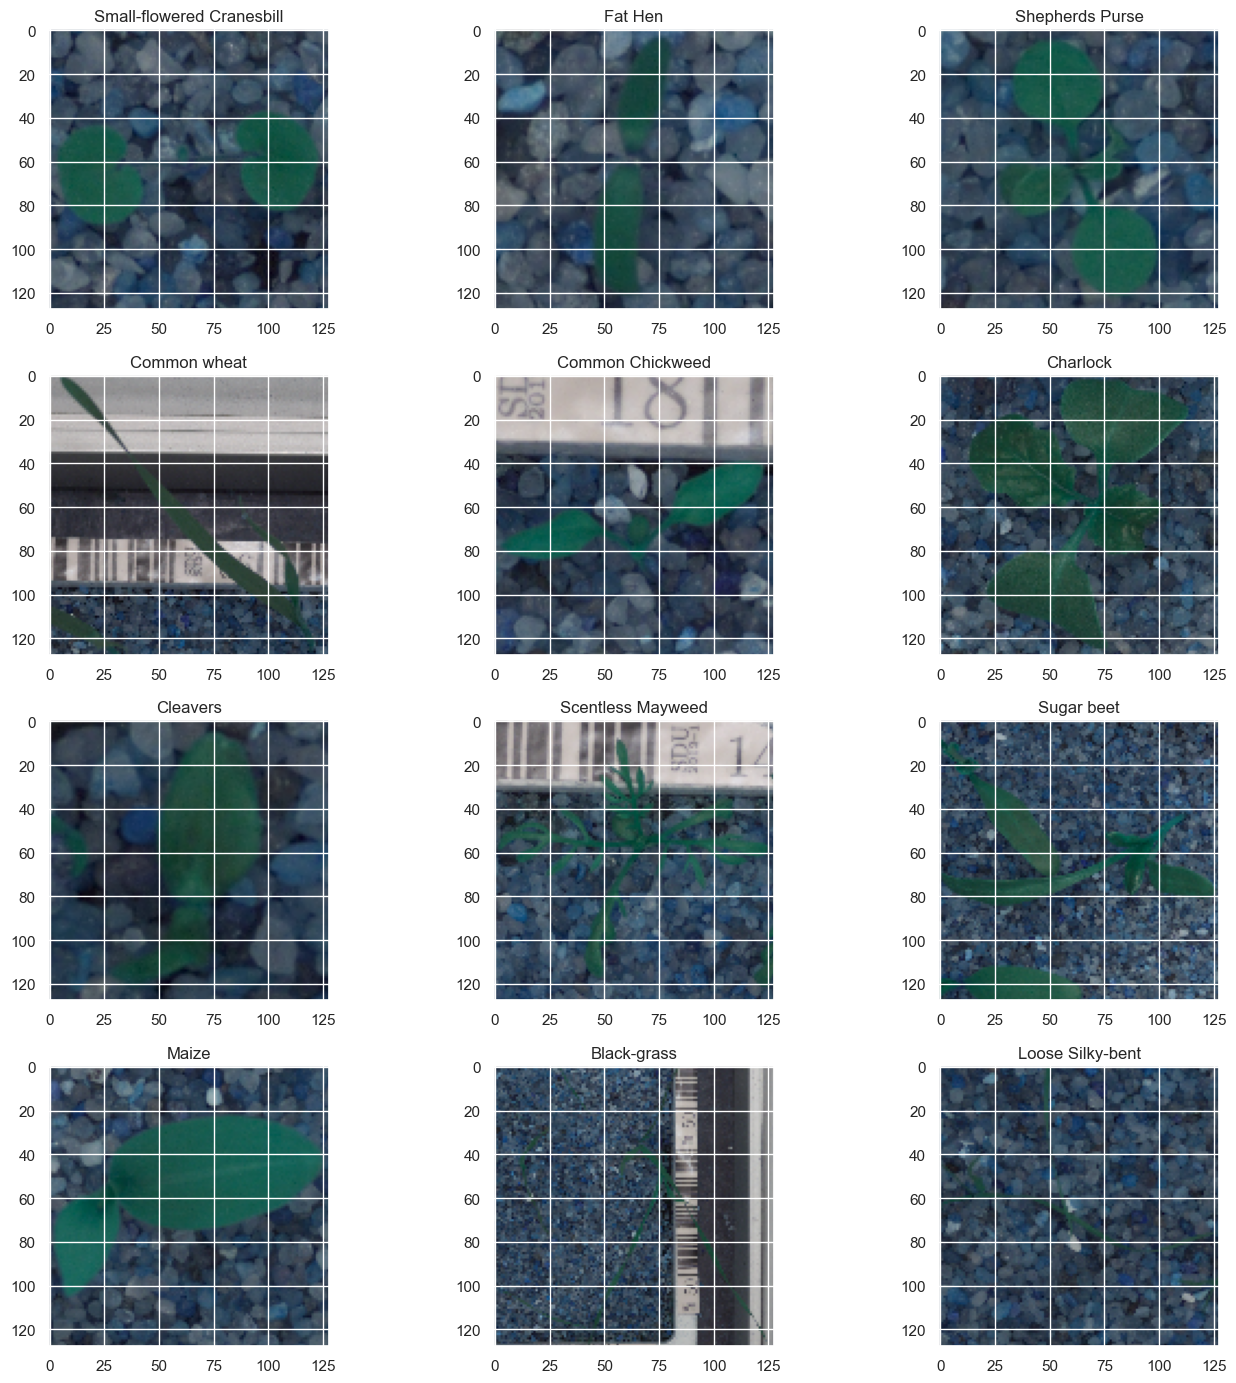

In [10]:
# Plotting the Images - As stored in NPY File:

plot_images(images)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** All Images have the same Size which is expected as the Dimensions were found to be 128x128 earlier.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** While some Images are blurred - Not good for Feature Extraction, other show a good resolution.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Images appear to be formatted using BGR Colour Scheme instead of RGB. Further processing is required in the upcoming analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** While some Plants have a soil background, some of them have different objects in the background which will make it more difficult to extract the important features.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** While some Plants are located at the Image's Center, some of them are on sides.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** While some Plants are fully shown in the Images, some Images show only a part of the Plant (Stem, Leaf, ...).

Count Plot: Labels

Common wheat                 221
Maize                        221
Shepherds Purse              231
Black-grass                  263
Cleavers                     287
Sugar beet                   385
Charlock                     390
Fat Hen                      475
Small-flowered Cranesbill    496
Scentless Mayweed            516
Common Chickweed             611
Loose Silky-bent             654
Name: Label, dtype: int64


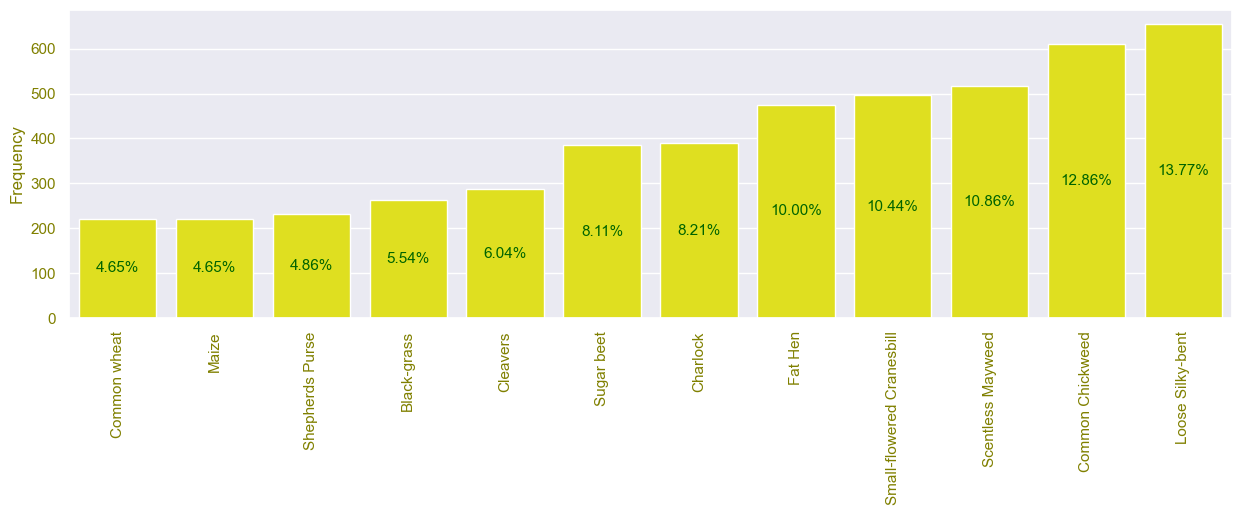

In [11]:
# Checking the Distribution of Discrete Features:

print('\033[0m' , '\033[92m' , 'Count Plot: ' , 
      '\033[1m' , '\033[91m' , 'Labels' , '\n' 
      '\033[0m' , '\033[92m' , sep='')

total = float(len(labels))
plt.figure(figsize=(15 , 4))


print(labels['Label'].value_counts().sort_values(ascending=True))
plot = sns.countplot(data=labels , x = 'Label' , color = 'yellow', 
                     order=labels['Label'].value_counts(ascending=True).index)


for p in plot.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() * 0.5
    plot.annotate(percentage , (x, y) , ha='center' , va='center' , size=11 , color='darkgreen')

#plot.xticks(rotation = 90)
plot.set(xlabel=None)
plot.xaxis.label.set_color('olive')
plot.tick_params(axis='x', colors='olive' , rotation=90)
plot.set(ylabel='Frequency')
plot.yaxis.label.set_color('olive')
plot.tick_params(axis='y', colors='olive')
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Quite Imbalance is observed in the Dataset.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** While some Plants are represented with more than 10%, some of them are represented by less than 5%.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **4. Data Pre-Processing:**

In [12]:
# Converting the Images from BGR to RGB Colour Scheme:

for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i] , cv2.COLOR_BGR2RGB) 

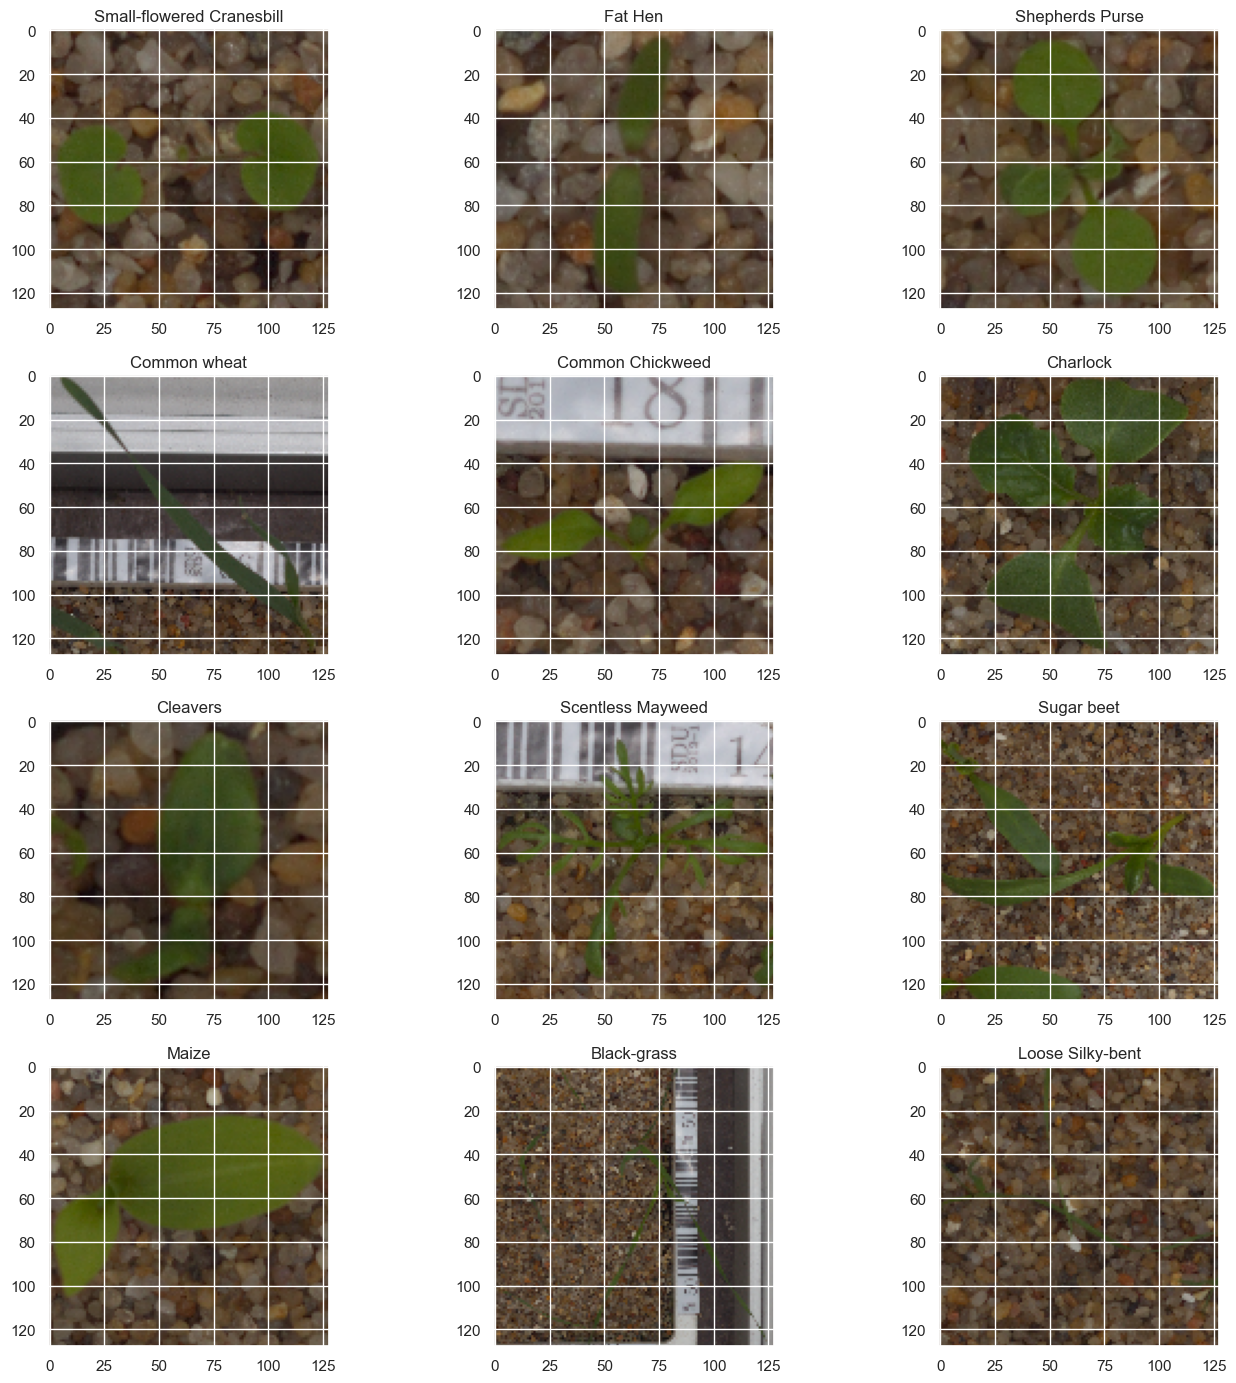

In [13]:
# Plotting the Images - After Colour Scheme Conversion:

plot_images(images)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Changing the Colour Scheme from BGR to RGB offers a better and more meaningful visualization of Images since the main object of interest 'Plant' has typically a Green Color.

In [14]:
# Resizing the Images to improve the Computation Cabability:

images_resized=[]
height = 64                    
width =  64                    
dimensions = (width, height)
for i in range(len(images)):
  images_resized.append(cv2.resize(images[i] , dimensions , interpolation=cv2.INTER_LINEAR))

images_resized = np.array(images_resized)

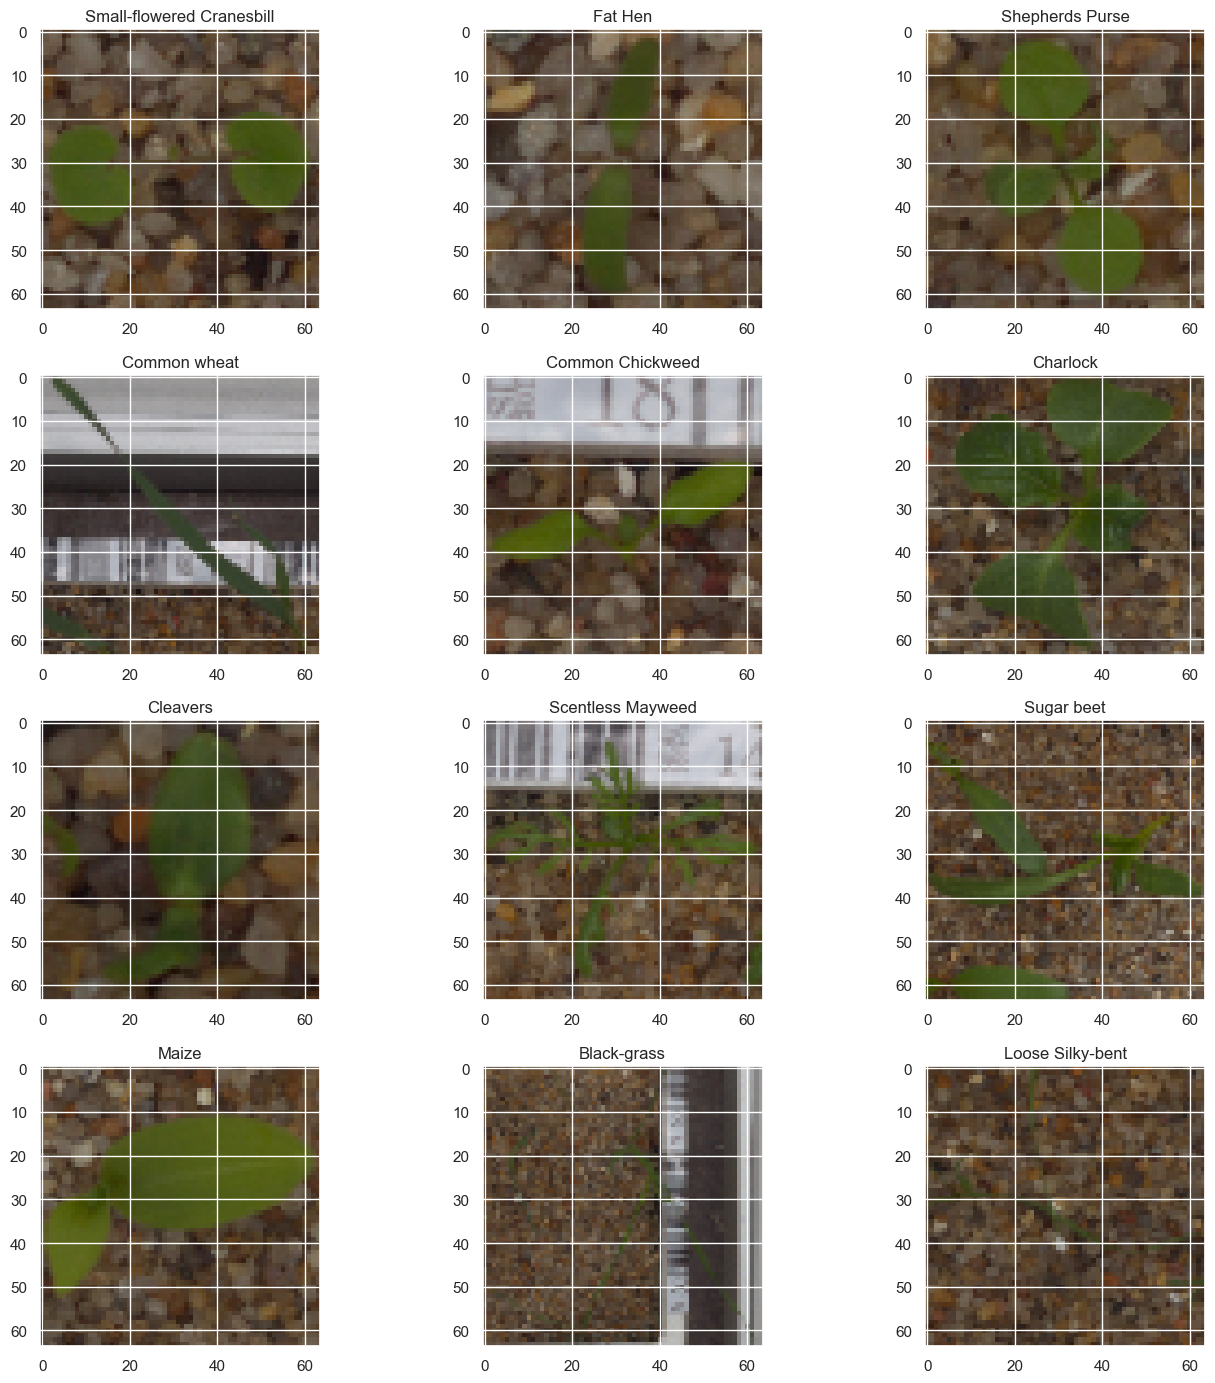

In [15]:
# Plotting the Images - After Rescaling to Half Size:

plot_images(images_resized)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Images have been rescaled by half (Down-Sampled) to imrove the computational capabilities.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Down-Sampling the Images using the Interpolation has reduced the image quality due to removing of Pixels; consequently, some fine details have been lost. 

In [16]:
# Gaussian Blurring the Images to reduce the noise and smoothen the Images:

images_blurred = []
for i in range(len(images_resized)):
    images_blurred.append(cv2.GaussianBlur(images_resized[i] , ksize=(3,3) , sigmaX=1))

images_blurred = np.array(images_blurred)

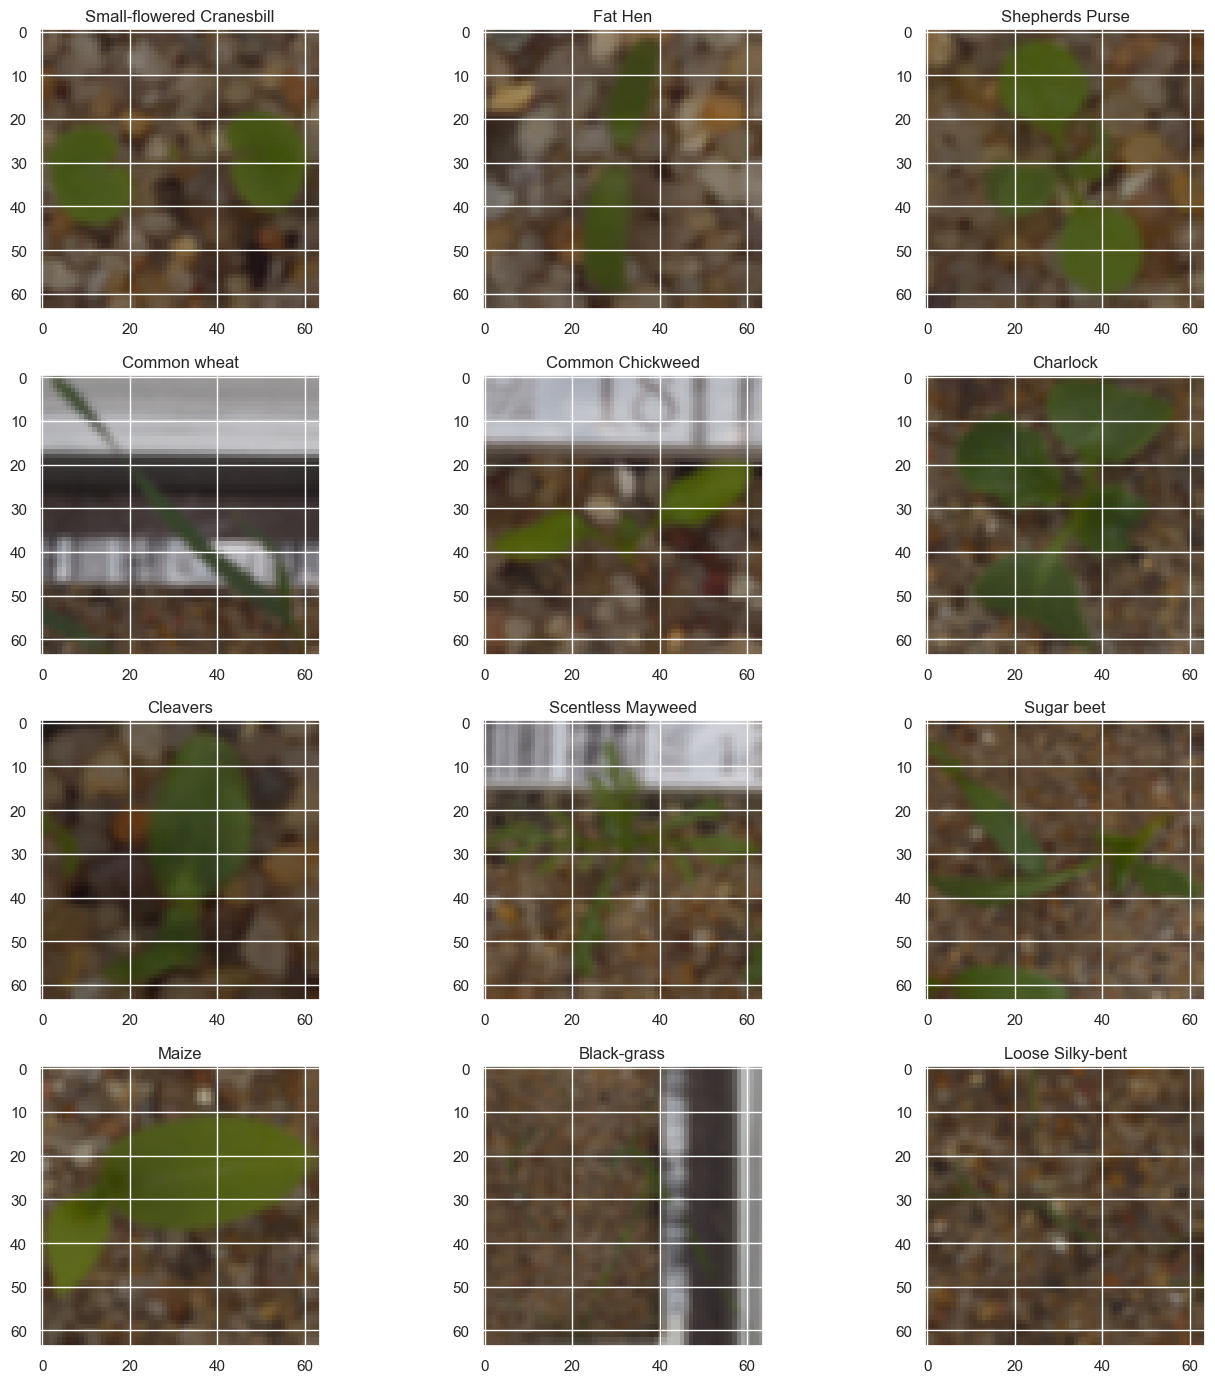

In [17]:
# Plotting the Images - After Gaussiab Blurring:

plot_images(images_blurred)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** It does not seem that Gaussian Blurring is helpful as some Images became completely blurred with no possibility to derive any kind of edges/fine details.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although the Gaussian Blurring might be helpful in many scenarios, it has failed here due to the low quality of some Images (Originally blurred!).

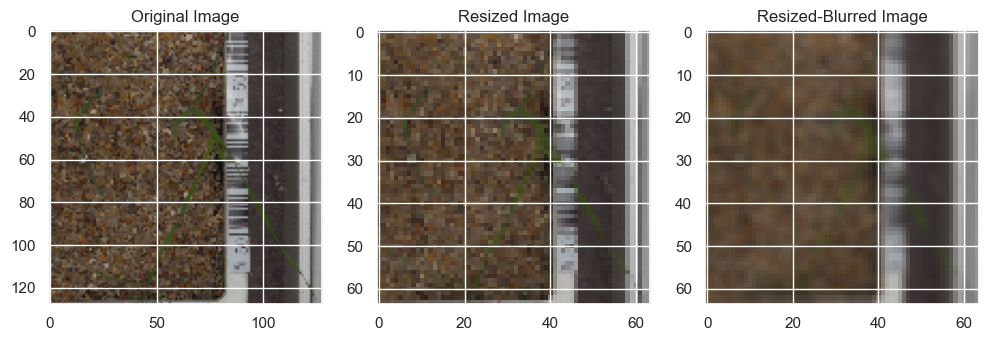

In [18]:
# Investigating the effects of Resizing and Gaussian Blurring on a selected Image:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(images[indices[10]])
axes[0].set_title('Original Image')

axes[1].imshow(images_resized[indices[10]])
axes[1].set_title('Resized Image')

axes[2].imshow(images_blurred[indices[10]])
axes[2].set_title('Resized-Blurred Image')

plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** By taking 'Image 10' as a sample, Gaussian Blurring of a Down-Sampled Image has led to extremely blurred image with non-visible fine details.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** As a result, we will continue with just the Rescaled Image and ignore the Gaussian Blurred ones!

<left> <font size=5 style='font-family:Courier New' color='Blue' > **Insights:**
<left> <font size=3 style='font-family:Courier New' color='black'> <br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Dataset consists of 4,750 images of different types of plants stored as 3D Numpy Arrays in 'npy' file along with their corresponding labels in 'csv' file.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Images are initially have BGR colour scheme (3 Channels) with a resolution of 128x128 and belong to 12 different classes.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Resolution is somehow low and not able to capture extreme fine details. Consequently, resizing makes it worse for the model to capture and learn edges.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Although of the dataset size is somehow fair enough, the presence of 12 classes reduces the images diversity for each plant type.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Imbalance between classes is observed; while some of classes are represented by less than 5% (Less than 250 images per class), some classes are well represented by more than 13% (More than 500 images per class). 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Low quality in many images is obvious like blurred images, images that contain only a part of the plant (Stems and Leaves) instead of the fully grown plant, and the presence of different backgrounds rather than having only the soil or gravel.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** In addition to the above point, different backgrounds result in increasing the noise and pushing the model to struggle while learning the relevant and important features. In turn, low accuracy and less generalarization would be expected.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** In Spite of losing some fine details during the resizing, such resizing it would be helpful by decreasing the model complexity and computational resources.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Taking into consideration the originally blurred and low quality images, gaussian blurring was not a good idea as it results in loosing more and more fine details in addition to extremely increasing in blurring.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Some plant types are not well distinguished in nature as they seem to have similar shape/structure; Consequently, mis-classification between such types is highly expected if the images are not well expressive and diverse enough. 

<left> <font size=6 style='font-family:Courier New' color='Orange' > **5. Data Preparation:**

In [19]:
# Splitting the Dataset into X_train, X_val, and X_test Subsets:

X_temp , X_test , y_temp , y_test = train_test_split(images_resized , labels , test_size=0.1 , random_state=1 , stratify=labels , shuffle=True)
X_train , X_val , y_train , y_val = train_test_split(X_temp , y_temp , test_size=0.1 , random_state=1 , stratify=y_temp , shuffle=True)  

In [20]:
# Checking the Shapes of Training, Validation, and Testing Subsets after Splitting:

print('\033[1m' , '\033[91m' , 'Dataset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Images Shape: ' , images.shape , sep='')
print('\033[0m' , '\033[92m' , 'Labels Shape: ' , labels.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Training Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_train Shape: ' , X_train.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_train Shape: ' , y_train.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Validation Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_val Shape: ' , X_val.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_val Shape: ' , y_val.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Testing Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_test Shape: ' , X_test.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_test Shape: ' , y_test.shape , sep='')

Dataset:
Images Shape: (4750, 128, 128, 3)
Labels Shape: (4750, 1)

----------------------------------------

Training Subset:
X_train Shape: (3847, 64, 64, 3)
y_train Shape: (3847, 1)

----------------------------------------

Validation Subset:
X_val Shape: (428, 64, 64, 3)
y_val Shape: (428, 1)

----------------------------------------

Testing Subset:
X_test Shape: (475, 64, 64, 3)
y_test Shape: (475, 1)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** No. of Samples of each Subset has been fixed according to the defined percentages.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Although the No. of Samples is different, all Subsets have the same Dimensions of Input Images/Pixel Maps (64,64,3).

In [21]:
# Encoding the Classes/Labels of y_train, y_val, and y_test:

label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_val_encoded = label_binarizer.transform(y_val)
y_test_encoded = label_binarizer.transform(y_test)  

In [22]:
# Investigating the Encoded Value for a Random Class/Label in y_train:

print('\033[0m' , '\033[92m' , y_train.loc[0 ,'Label'] , ': ' , 
      '\033[0m' , '\033[91m' , y_train_encoded[0] , sep='')

Small-flowered Cranesbill: [0 0 1 0 0 0 0 0 0 0 0 0]


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Lables/Classes has been converted from String Entries into a Vectors with a Length of 12.

In [23]:
# Normalizing the Input Image/Pixel Maps of X_train, X_val, and X_test:

X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [24]:
# Investigating the Normalized Values for a Random Input Image/Pixel Map in y_train:

print('\033[0m' , '\033[92m' , y_train.loc[0 ,'Label'] , ':\n ' , 
      '\033[0m' , '\033[91m' , X_train_normalized[0] , sep='')

Small-flowered Cranesbill:
 [[[0.22352941 0.2901961  0.1254902 ]
  [0.24705882 0.3019608  0.15686275]
  [0.23921569 0.29803923 0.14901961]
  ...
  [0.25490198 0.3137255  0.16470589]
  [0.2509804  0.30588236 0.16862746]
  [0.26666668 0.31764707 0.1882353 ]]

 [[0.23137255 0.28627452 0.14117648]
  [0.23529412 0.2784314  0.12941177]
  [0.23529412 0.2901961  0.13725491]
  ...
  [0.25490198 0.30980393 0.16470589]
  [0.25882354 0.30980393 0.18039216]
  [0.25490198 0.30980393 0.18431373]]

 [[0.23137255 0.2784314  0.13725491]
  [0.23921569 0.27450982 0.13725491]
  [0.24313726 0.2901961  0.15294118]
  ...
  [0.25882354 0.30980393 0.17254902]
  [0.25882354 0.3019608  0.1764706 ]
  [0.2509804  0.29411766 0.16470589]]

 ...

 [[0.24705882 0.12156863 0.07843138]
  [0.25490198 0.12941177 0.07843138]
  [0.26666668 0.14117648 0.09411765]
  ...
  [0.23529412 0.15294118 0.11764706]
  [0.25882354 0.17254902 0.12941177]
  [0.27450982 0.18039216 0.1254902 ]]

 [[0.23137255 0.12941177 0.07058824]
  [0.2549

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Pixel Maps/Input Images/3D Arrays have been successfully normalized to have 0 Mean and 1 Standard Deviation/Variance.

In [25]:
# Checking the Shapes of Training, Validation, and Testing Subsets after Encoding and Normalization:

print('\033[1m' , '\033[91m' , 'Dataset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'Images Shape: ' , images.shape , sep='')
print('\033[0m' , '\033[92m' , 'Labels Shape: ' , labels.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Training Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_train Shape: ' , X_train_normalized.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_train Shape: ' , y_train_encoded.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Validation Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_val Shape: ' , X_val_normalized.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_val Shape: ' , y_val_encoded.shape , sep='')

print('\033[0m' , '\033[92m' , '\n' , '-'*40 , '\n' , sep='')

print('\033[1m' , '\033[91m' , 'Testing Subset:' , '\033[0m' , sep='')
print('\033[0m' , '\033[92m' , 'X_test Shape: ' , X_test_normalized.shape , sep='')
print('\033[0m' , '\033[92m' , 'y_test Shape: ' , y_test_encoded.shape , sep='')

Dataset:
Images Shape: (4750, 128, 128, 3)
Labels Shape: (4750, 1)

----------------------------------------

Training Subset:
X_train Shape: (3847, 64, 64, 3)
y_train Shape: (3847, 12)

----------------------------------------

Validation Subset:
X_val Shape: (428, 64, 64, 3)
y_val Shape: (428, 12)

----------------------------------------

Testing Subset:
X_test Shape: (475, 64, 64, 3)
y_test Shape: (475, 12)


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** X_train, X_val, and X_test contains 3,847, 428, and 475 Numpy Arrays respectively; each Array has 3 Channels with a resized resolution of 64x64 represent the Images in normalized form.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** y_train, y_val, and y_test contains 3,847, 428, and 475 Vectors respectively; each Vector has a length of 12 and represents the encoded Labels/Classes.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **6. Building Convolutional Neural Network Model:**  

<left> <font size=5 style='font-family:Courier New' color='Blue' > **Building Model 1** 

In [26]:
# Clearing the Sessions and Setting the Random Seeding:

backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

<left> <font size=5 style='font-family:Courier New' color='Green'> **Notes:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Initial Model 'model_1' will be built using 3 Convolutional Layers and 2 Fully Connected Layers with a Flatten Layer in between.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Regularization Techniques (Batch Normalization and Dropout) will be used to prevent Overfitting during the Training Process.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Adam as Optimizer, Categorical Cross Entropy as Loss Function, Accuracy as Performance Metric, and ReduceLROnPlateau as Call Back will be used to train the Model.

In [27]:
# Building model_1:

model_1 = Sequential()

model_1.add(Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , input_shape=(64,64,3) , padding='same'))
model_1.add(MaxPooling2D(pool_size=(2,2) , padding='same'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , padding='same'))
model_1.add(MaxPooling2D(pool_size=(2,2) , padding='same'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=16 , kernel_size=(3,3) , activation='relu' , padding='same'))
model_1.add(MaxPooling2D(pool_size=(2,2) , padding='same'))
model_1.add(BatchNormalization())

model_1.add(Flatten())

model_1.add(Dense(units=16 , activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(rate=0.25))

model_1.add(Dense(units=12 , activation= 'softmax'))

In [28]:
# Compiling model_1:

optimizer = Adam()

model_1.compile(loss='categorical_crossentropy' , optimizer= optimizer ,  metrics = ['accuracy'])

In [29]:
# Summarizing model_1:

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Total No. of Parameters is neither large nor small; Thus, complex model and higher computational requirements will be avoided.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** While the Input Image has 64x64 Dimensions, the last Feature Maps will be 8x8 after deploying 3 Max Pooling Layers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** The last Layer has 12 Neurons which equal to the No. of Classes/Plant Types/Labels in the Dataset.

In [30]:
# Fitting/Training model_1:

start_time = time.time()

BATCH_1 = 32
EPOCHS_1 = 30

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy' , patience=3 , verbose=1 , factor=0.5 , min_lr=0.00001)
# check_point = ModelCheckpoint(filename='best_model.h5' , monitor='val_accuracy' , verbose=1 , mode='max' , save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss' , mode='min' , verbose=1 , patience=5)

history_1 = model_1.fit(X_train_normalized , y_train_encoded , validation_data=(X_val_normalized , y_val_encoded) ,
                        epochs=EPOCHS_1 , batch_size=BATCH_1 , verbose=1 , callbacks=[learning_rate_reduction] , 
                        use_multiprocessing=True)

end_time = time.time()
elapsed_time_1 = end_time - start_time
print('\033[1m' , '\033[94m' , '\nExecution Time = ', '{:.5f}'.format(elapsed_time_1), ' Seconds!' , sep='')

Epoch 1/30
121/121 [==============================] - 13s 102ms/step - loss: 2.2347 - accuracy: 0.2566 - val_loss: 2.8008 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 2/30
121/121 [==============================] - 12s 98ms/step - loss: 1.5966 - accuracy: 0.4684 - val_loss: 3.1925 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/30
121/121 [==============================] - 12s 97ms/step - loss: 1.3107 - accuracy: 0.5844 - val_loss: 3.1903 - val_accuracy: 0.1425 - lr: 0.0010
Epoch 4/30
121/121 [==============================] - 12s 96ms/step - loss: 1.1033 - accuracy: 0.6467 - val_loss: 2.8019 - val_accuracy: 0.1612 - lr: 0.0010
Epoch 5/30
121/121 [==============================] - 12s 98ms/step - loss: 0.9278 - accuracy: 0.7180 - val_loss: 2.6536 - val_accuracy: 0.3131 - lr: 0.0010
Epoch 6/30
121/121 [==============================] - 12s 100ms/step - loss: 0.8186 - accuracy: 0.7453 - val_loss: 1.3229 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 7/30
121/121 [==============================] - 12

<left> <font size=5 style='font-family:Courier New' color='Green'> **Notes:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **ReduceLROnPlateau:** Reduces the Learning Rate when the Metric stops improving or plateaus.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **EarlyStopping:** Stops the Training Process if the Metric does not improve over a certain No. of Epochs.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **ModelCheckpoint:** Saves the Model's Weights at different points/when the Matric is improved during the Training Process.

In [31]:
# Defining a Function to Plot the Performance Curves:
    
def plot_history(history):
    N = len(history.history['accuracy'])
    plt.figure()
    plt.plot(np.arange(0,N) , history.history['accuracy'])
    plt.plot(np.arange(0,N) , history.history['val_accuracy'])
    plt.title('Model Performance Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training','Validation'] , loc='best')

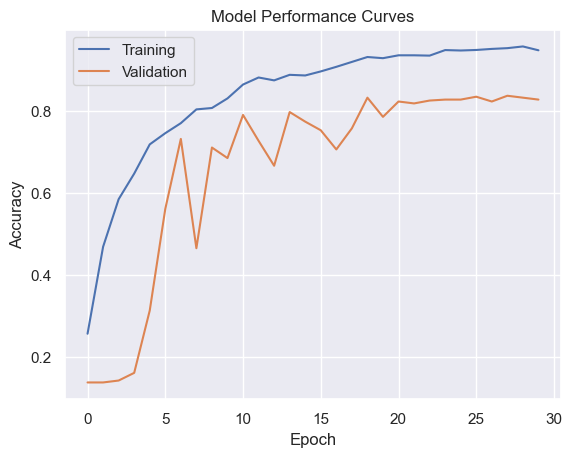

In [32]:
# Plotting model_1 History:

plot_history(history_1)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Initial Model 'model_1' has been trained for 30 Epochs with a Total Time of approximately 356 Seconds.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** model_1 shows an excellent performance on Training Data with high Accuracy (Around 95%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Although of good Accuracy on Validation Data (Around 83%), an Overfitting is quite observed due to the Gap between Training and Validation Curves (Around 12%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Although of some Fluctuations in the Validation Curve (Epochs: 6 - 19), model_1 starts to show stable convergence at Epoch 20.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** No. of Epochs seems to be enough as model_1 start to have a flatten curve with no indication of increasing or continuous improvement.

In [33]:
# Evaluating model_1 on Test Data:

model_1.evaluate(X_test_normalized , y_test_encoded , verbose=1)

15/15 [==============================] - 0s 22ms/step - loss: 0.5677 - accuracy: 0.8253


[0.5676860213279724, 0.8252631425857544]

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The values of both Accuracy and Loss on Testing Data are somehow similar to their values on Validation Data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although of previously observed Overfitting, model_1 does not show drop in performance when being tested on Unseen Data.

In [34]:
# Finding model_1 Predictions:

y_result_1 = model_1.predict(X_test_normalized)
y_result_1_final = []
for i in y_result_1:
    y_result_1_final.append(np.argmax(i))
y_result_1_final = np.array(y_result_1_final)

y_test_list = []
for i in y_test_encoded:
    y_test_list.append(np.argmax(i))
y_test_array = np.array(y_test_list)

In [35]:
# Plotting the Classification Report of model_1:

print(classification_report(y_test_array , y_result_1_final))

              precision    recall  f1-score   support

           0       0.47      0.35      0.40        26
           1       0.97      0.92      0.95        39
           2       0.83      0.83      0.83        29
           3       0.95      0.89      0.92        61
           4       0.68      0.68      0.68        22
           5       0.91      0.83      0.87        48
           6       0.73      0.92      0.82        65
           7       0.95      0.82      0.88        22
           8       0.78      0.87      0.82        52
           9       0.77      0.74      0.76        23
          10       0.90      0.94      0.92        50
          11       0.79      0.71      0.75        38

    accuracy                           0.83       475
   macro avg       0.81      0.79      0.80       475
weighted avg       0.83      0.83      0.82       475



<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Although of almost good values of Accuracy, Precision, Recall, and F1 Score across most of Classes, Class 0 shows deficiency with values less than 50%!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although of Class 0 is not the lowest one in terms of No. of samples (26 Samples), it seems that either its images are not expressive enough, or there is some kind of similarity between it and another Plant Type.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** By comparing the No. of Samples per Class with Metric Values, we may observe that there is no direct or obvious relationship between Sample Size and performance. i.e.: Some Plants have excellent Metrics inspite of small Sample Size (Class 1 has the best predictions and lowest errors although it has only 39 Samples).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Overall, Model's Accuracy, Precision, Recall, and F1 Score have good and similar values that range from 82% to 83%.

In [36]:
# Saving model_1 Performance Metrics:

model_1_accuracy = accuracy_score(y_test_array , y_result_1_final)
model_1_recall = recall_score(y_test_array , y_result_1_final , average='weighted')
model_1_precision = precision_score(y_test_array , y_result_1_final , average='weighted')
model_1_f1score = f1_score(y_test_array , y_result_1_final , average='weighted')

print('\033[0m' , '\033[92m' , 'Performance Metrics (' ,  
      '\033[1m' , '\033[91m' , 'Model 1' , 
      '\033[0m' , '\033[92m' , '):' , '\n', 
      '\033[0m' , '\033[92m' , 'Accuracy: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_1_accuracy) , '\n',  
      '\033[0m' , '\033[92m' , 'Recall: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_1_recall) , '\n', 
      '\033[0m' , '\033[92m' , 'Precision: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_1_precision) , '\n', 
      '\033[0m' , '\033[92m' , 'F1 Score: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_1_f1score) ,sep='')

Performance Metrics (Model 1):
Accuracy: 	0.825
Recall: 	0.825
Precision: 	0.826
F1 Score: 	0.823


In [37]:
# Defining a Function to plot the Confusion Matrix:

def plot_cm(actuals , predictions):
    confusion_matrix = tf.math.confusion_matrix(actuals , predictions)
    f , ax = plt.subplots(figsize=(12 , 12))
    sns.heatmap(confusion_matrix , annot=True , linewidths=0.4 , fmt='d' , square=True , ax=ax , cmap='viridis')
    ax.set_xlabel('Predicted Plant Type')
    ax.set_ylabel('Actual Plant Type')
    ax.set_title('')
    ax.xaxis.set_ticklabels(list(label_binarizer.classes_),rotation=90)
    ax.yaxis.set_ticklabels(list(label_binarizer.classes_),rotation=0)
    plt.show();

Confusion Matrix (Model 1):


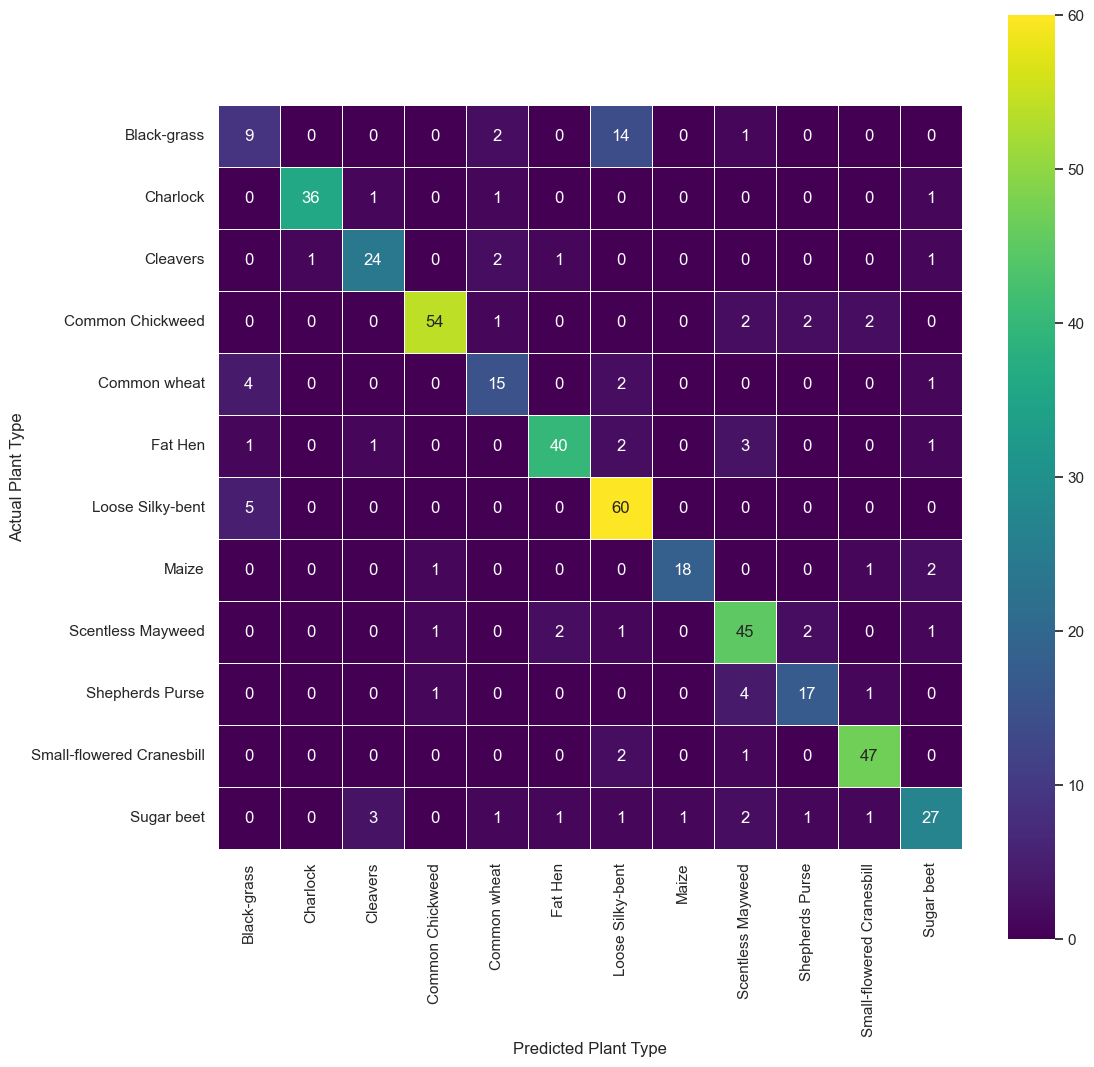

In [38]:
# Plotting the Confusion Matrix of model_1:

print('\033[0m' , '\033[92m' , 'Confusion Matrix (' ,  
      '\033[1m' , '\033[91m' , 'Model 1' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

plot_cm(y_test_array , y_result_1_final)

In [39]:
# Finding the Counts of Classifications for model_1:

model_1_correct = np.array(np.where(y_test_array == y_result_1_final))[0]
model_1_wrong = np.array(np.where(y_test_array != y_result_1_final))[0]

print('\033[0m' , '\033[92m' , 'Testing Results (' ,  
      '\033[1m' , '\033[91m' , 'Model 1' , 
      '\033[0m' , '\033[92m' , '):' , sep='')
print('\033[0m' , '\033[92m' , 'Total Images: \t\t' ,  
      '\033[1m' , '\033[91m' , y_test.shape[0] , sep='')
print('\033[0m' , '\033[92m' , 'Correctly Classified: \t' ,  
      '\033[1m' , '\033[91m' , len(model_1_correct) , sep='')
print('\033[0m' , '\033[92m' , 'Wrongly Classified: \t' ,  
      '\033[1m' , '\033[91m' , len(model_1_wrong) , sep='')

Testing Results (Model 1):
Total Images: 		475
Correctly Classified: 	392
Wrongly Classified: 	83


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** It's quite expected to have high Error Rate (Wrong Classifications) on Class 0 due to extreme low Metric values in Classification Report.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Whereas 9 of Images in Class 0 (Black-grass) have been correctly classified, 14 Images have been wrongly classified as Class 6 (Loose Silky-bent).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Obviously, both of Classes 0 and 6 show interchangeability in sharing the wrong predictions with highest No. of wrong classifications (14 and 5 respectively), such phenomenon needs more investigation to discover out if these two plant types are similar in nature.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** In Addition to both Classes 0 and 6, there are some Mis-Classifications with values below 5 (4 Common Wheat Images have been wrongly classified as Black-grass, 4 Shepherds Purse Images have been wrongly classified as Scentless Mayweed, etc.).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** Overall, out of 475 Images in Testing Data: <br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** 392 Images have been correctly classified.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** 83 Images have been wrongly classified.

<left> <font size=5 style='font-family:Courier New' color='Green'> **ًWhat to do!**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** In order to address the problem of Overfitting and to exclude the effect of having small sample sizes or not enoughly expressiive images, we may use Data Augmentation to increase the size and diversity of the Training Data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** We will keep the same structure of the model in terms of the count and contents of layers to investigate the effect of Data Augmentation on improving the performance.

<left> <font size=5 style='font-family:Courier New' color='Blue' > **Building Model 2:** 

In [40]:
# Clearing the Sessions and Setting the Random Seeding:

backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

<left> <font size=5 style='font-family:Courier New' color='Green'> **Notes:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Improved Model 'model_2' will be built using 3 Convolutional Layers and 2 Fully Connected Layers with a Flatten Layer in between.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Regularization Techniques (Batch Normalization and Dropout) will be used to prevent Overfitting during the Training Process.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Adam as Optimizer, Categorical Cross Entropy as Loss Function, Accuracy as Performance Metric, and ReduceLROnPlateau as Call Back will be used to train the Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Data Augmentation will be used to increase  the size and diversity of Training Data. Thus, Biased Learning and Overfitting could be - hopefully - addressed.

In [41]:
# Building model_2:

model_2 = Sequential()

model_2.add(Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , input_shape=(64,64,3) , padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2) , padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2) , padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=16 , kernel_size=(3,3) , activation='relu' , padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2) , padding='same'))
model_2.add(BatchNormalization())

model_2.add(Flatten())

model_2.add(Dense(units=16 , activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.25))

model_2.add(Dense(units=12 , activation= 'softmax'))

In [42]:
# Compiling model_2:

optimizer = Adam()

model_2.compile(loss='categorical_crossentropy' , optimizer= optimizer ,  metrics = ['accuracy'])

In [43]:
# Summarizing model_2:

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Total No. of Parameters remains unchanged  for model_2.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Actually, the same Model's Structure has been used for model_1 and model_2 to discover the effect of Data Augmentation while keeping the same parameters unchanged.

In [44]:
# Defining the Augmented Images Generator:

datagen = ImageDataGenerator(horizontal_flip = True , vertical_flip = True , height_shift_range= 0.1 , 
                             width_shift_range=0.1 , rotation_range=45 , shear_range = 0.3 , zoom_range=0.3)

In [45]:
# Fitting/Training model_2:

start_time = time.time()

BATCH_2 = 32
EPOCHS_2 = 30

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy' , patience=3 , verbose=1 , factor=0.5 , min_lr=0.00001)
# check_point = ModelCheckpoint(filename='best_model.h5' , monitor='val_accuracy' , verbose=1 , mode='max' , save_best_only=True)
# early_stopping = EarlyStopping(monitor='val_loss' , mode='min' , verbose=1 , patience=5)

history_2 = model_2.fit(datagen.flow(X_train_normalized , y_train_encoded , batch_size=BATCH_2 , seed=42 , shuffle=False) ,
                                     validation_data=(X_val_normalized , y_val_encoded) ,
                                     steps_per_epoch=X_train_normalized.shape[0] // BATCH_2 ,
                                     epochs=EPOCHS_2 , verbose=1 , callbacks=[learning_rate_reduction])

end_time = time.time()
elapsed_time_2 = end_time - start_time
print('\033[1m' , '\033[94m' , '\nExecution Time = ', '{:.5f}'.format(elapsed_time_2), ' Seconds!' , sep='')

Epoch 1/30
120/120 [==============================] - 13s 102ms/step - loss: 2.3062 - accuracy: 0.2231 - val_loss: 2.9927 - val_accuracy: 0.0678 - lr: 0.0010
Epoch 2/30
120/120 [==============================] - 13s 105ms/step - loss: 1.7314 - accuracy: 0.4079 - val_loss: 3.2492 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 3/30
120/120 [==============================] - 13s 106ms/step - loss: 1.5138 - accuracy: 0.4970 - val_loss: 3.0711 - val_accuracy: 0.1355 - lr: 0.0010
Epoch 4/30
120/120 [==============================] - 12s 100ms/step - loss: 1.3531 - accuracy: 0.5539 - val_loss: 2.3750 - val_accuracy: 0.1963 - lr: 0.0010
Epoch 5/30
120/120 [==============================] - 12s 99ms/step - loss: 1.2422 - accuracy: 0.5950 - val_loss: 2.7283 - val_accuracy: 0.2360 - lr: 0.0010
Epoch 6/30
120/120 [==============================] - 12s 99ms/step - loss: 1.1374 - accuracy: 0.6168 - val_loss: 0.9570 - val_accuracy: 0.7009 - lr: 0.0010
Epoch 7/30
120/120 [==============================] - 

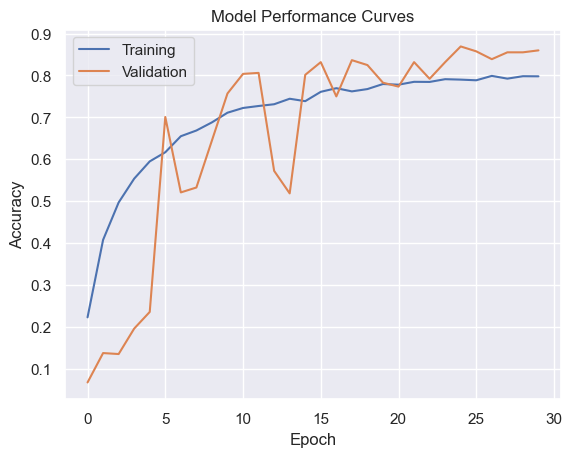

In [46]:
# Plotting model_2 History:

plot_history(history_2)

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Although 'model_2' has been trained for the same No. of Epochs as in model_1 (30 Epochs), The Total Time of Training is almost the same (Approximately 386 Seconds) inspite of using Data Augmentation - Larger Training Data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Accuracy on Training Data has decreased from 95% in model_1 to 80% in model_2.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Accuracy on Validation Data has increased from 82% in model_1 to 86% in model_2; consequently, Overfitting issue has been addressed.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Although of some Fluctuations in the Validation Curve (Epochs: 5 - 24), model_2 starts to show stable convergence at Epoch 25.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** No. of Epochs seems to be enough as model_2 start to have a flatten curve with no indication of increasing or continuous improvement.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** Overall, model_2 seems to be better in preventing the Overfitting although it tooks longer time comparing with model_1 (in terms of No. of Epochs) to converge. Accordingly, Data Augmentation was a good and useful tool to enhance the Model's Performance.

In [47]:
# Evaluating model_2 on Test Data:

model_2.evaluate(X_test_normalized , y_test_encoded , verbose=1)

15/15 [==============================] - 0s 22ms/step - loss: 0.3867 - accuracy: 0.8653


[0.386689156293869, 0.8652631640434265]

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The values of both Accuracy and Loss on Testing Data are better than their values on Validation Data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** In  Addition to preventing Overfitting, model_2 shows jump in performance when being tested on Unseen Data which lead to better Generalization.

In [48]:
# Finding model_2 Predictions:

y_result_2 = model_2.predict(X_test_normalized)
y_result_2_final = []
for i in y_result_2:
    y_result_2_final.append(np.argmax(i))
y_result_2_final = np.array(y_result_2_final)

In [49]:
# Plotting the Classification Report of model_2:

print(classification_report(y_test_array , y_result_2_final))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57        26
           1       0.84      0.97      0.90        39
           2       0.89      0.86      0.88        29
           3       0.93      0.90      0.92        61
           4       0.75      0.82      0.78        22
           5       0.94      0.94      0.94        48
           6       0.84      0.83      0.84        65
           7       0.95      0.95      0.95        22
           8       0.80      0.94      0.87        52
           9       0.83      0.65      0.73        23
          10       0.98      0.92      0.95        50
          11       0.86      0.82      0.84        38

    accuracy                           0.87       475
   macro avg       0.85      0.85      0.85       475
weighted avg       0.87      0.87      0.86       475



<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Almost acceptable values of Accuracy, Precision, Recall, and F1 Score across most of Classes.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although of low performance values for Class 0, it is better than model_1 where it hasn't exceed the 50%.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Although of overall improvement in Weighted Average Metrics, Class 0 still show immunity against noticeable improvement. Thus, we may confirm the hypothesis of low quality images , or the similarity with another Plant Type.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** The previous assumption of no direct or obvious relationship between Sample Size and performance is still valid. i.e.: Some Plants with smaller Sample Size has better metrics than others with larger Sample Size.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** Model's Accuracy, Precision, Recall, and F1 Score have very good and similar values that range from 86% to 87%.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** Overall, Model's Metrics have been improved from around 82%-83% in model_1 to 86%-87% in model_2.

In [50]:
# Saving model_2 Performance Metrics:

model_2_accuracy = accuracy_score(y_test_array , y_result_2_final)
model_2_recall = recall_score(y_test_array , y_result_2_final , average='weighted')
model_2_precision = precision_score(y_test_array , y_result_2_final , average='weighted')
model_2_f1score = f1_score(y_test_array , y_result_2_final , average='weighted')

print('\033[0m' , '\033[92m' , 'Performance Metrics (' ,  
      '\033[1m' , '\033[91m' , 'Model 2' , 
      '\033[0m' , '\033[92m' , '):' , '\n', 
      '\033[0m' , '\033[92m' , 'Accuracy: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_2_accuracy) , '\n',  
      '\033[0m' , '\033[92m' , 'Recall: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_2_recall) , '\n', 
      '\033[0m' , '\033[92m' , 'Precision: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_2_precision) , '\n', 
      '\033[0m' , '\033[92m' , 'F1 Score: ' , 
      '\033[1m' , '\033[91m' , '\t{0:.3f}'.format(model_2_f1score) ,sep='')

Performance Metrics (Model 2):
Accuracy: 	0.865
Recall: 	0.865
Precision: 	0.866
F1 Score: 	0.864


Confusion Matrix (Model 2):


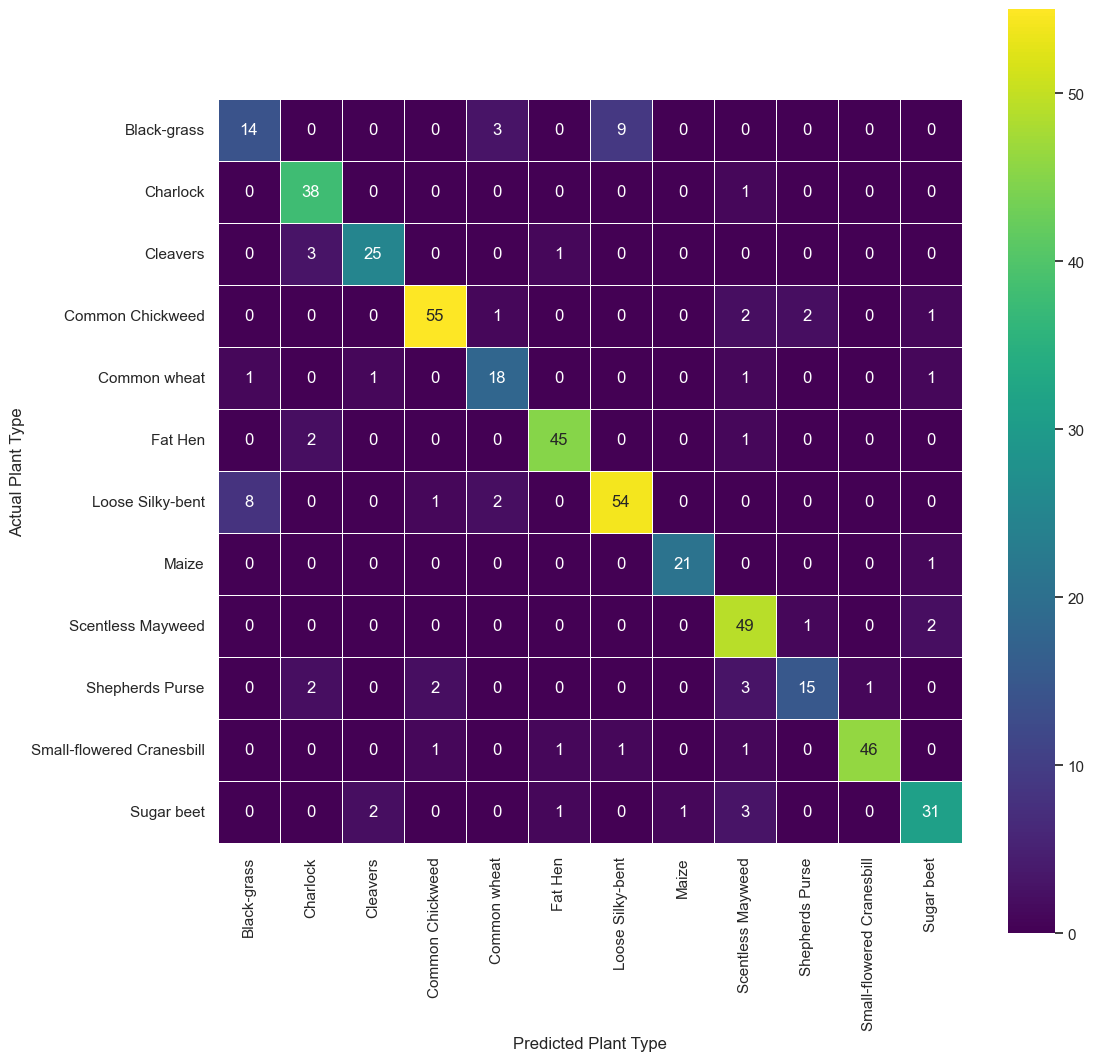

In [51]:
# Plotting the Confusion Matrix of model_2:

print('\033[0m' , '\033[92m' , 'Confusion Matrix (' ,  
      '\033[1m' , '\033[91m' , 'Model 2' , 
      '\033[0m' , '\033[92m' , '):' , sep='')

plot_cm(y_test_array , y_result_2_final)

In [52]:
# Finding the Counts of Classifications for model_2:

model_2_correct = np.array(np.where(y_test_array == y_result_2_final))[0]
model_2_wrong = np.array(np.where(y_test_array != y_result_2_final))[0]

print('\033[0m' , '\033[92m' , 'Testing Results (' ,  
      '\033[1m' , '\033[91m' , 'Model 2' , 
      '\033[0m' , '\033[92m' , '):' , sep='')
print('\033[0m' , '\033[92m' , 'Total Images: \t\t' ,  
      '\033[1m' , '\033[91m' , y_test.shape[0] , sep='')
print('\033[0m' , '\033[92m' , 'Correctly Classified: \t' ,  
      '\033[1m' , '\033[91m' , len(model_2_correct) , sep='')
print('\033[0m' , '\033[92m' , 'Wrongly Classified: \t' ,  
      '\033[1m' , '\033[91m' , len(model_2_wrong) , sep='')

Testing Results (Model 2):
Total Images: 		475
Correctly Classified: 	411
Wrongly Classified: 	64


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** It's quite expected to still have high Error Rate (Wrong Classifications) on Class 0 due to extreme low Metric values in Classification Report. Nevertheless, No. of wrong classification has decreased from 17 in model_1 to only 12 in model_2.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Whereas 14 of Images in Class 0 (Black-grass) have been correctly classified, 9 Images have been wrongly classified as Class 6 (Loose Silky-bent).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Obviously, both of Classes 0 and 6 still show interchangeability in sharing the wrong predictions with highest No. of wrong classifications (9 and 8 respectively). <br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Although of improvement in predictions for Class 0, Class 6 on the other hand shows a drop. Hence, such phenomenon will be investigated in the upcoming section to discover out if these two plant types are similar in nature.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** In Addition to both Classes 0 and 6, there are still some Mis-Classifications with values below 4.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** Overall, out of 475 Images in Testing Data: <br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** 411 Images have been correctly classified (+19 comparing with model_1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** 64 Images have been wrongly classified (-19 comparing with model_1).

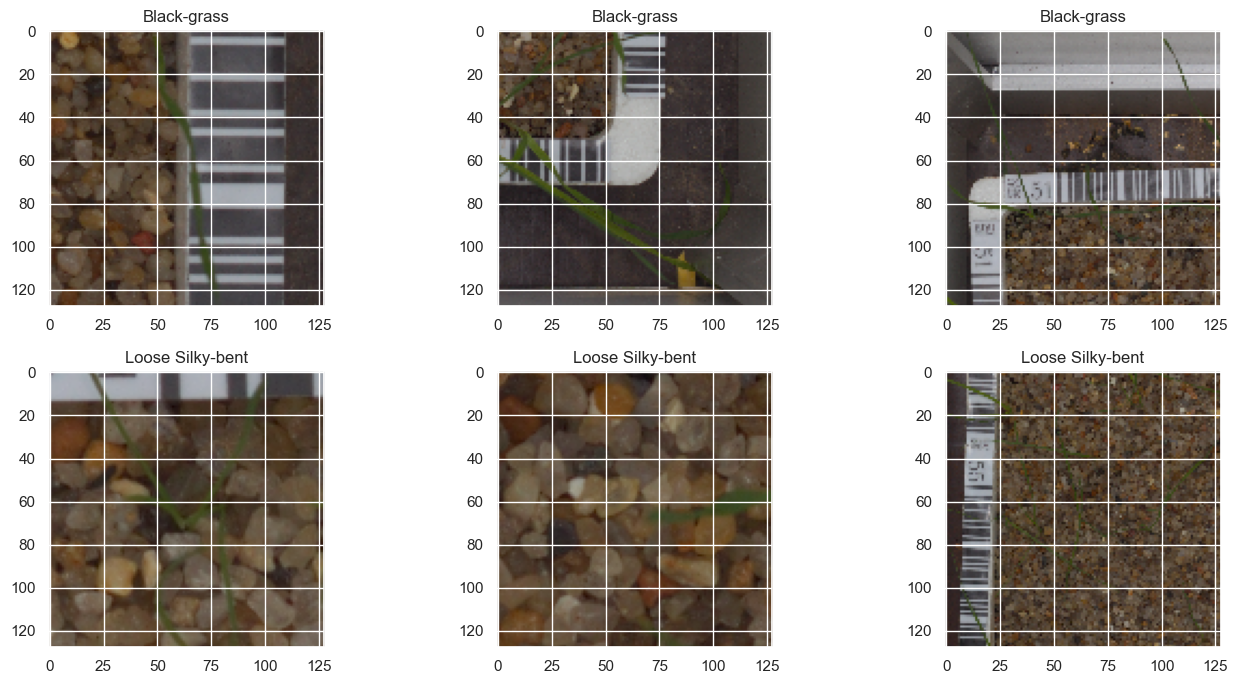

In [53]:
# Plotting Random 3 Images from Classes with high Error Rate (Class 0: Black-grass & Class 6: Loose Silky-bent):

class1_indices = np.where(labels['Label'] == 'Black-grass')[0]
class1_random = np.random.choice(class1_indices , size=3 , replace=False)

class7_indices = np.where(labels['Label'] == 'Loose Silky-bent')[0]
class7_random = np.random.choice(class7_indices , size=3 , replace=False)

classes_random = np.concatenate((class1_random , class7_random))

fig , axes = plt.subplots(2 , 3 , figsize=(14,7))
for i, ax in enumerate(axes.flatten()):
    image = images[classes_random[i]]
    label = labels['Label'][classes_random[i]]
    ax.imshow(image)
    ax.set_title(label)
plt.tight_layout()
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The reason behind shared wrong preditions between Class 0 and Class 6 is quite obvious and explained now! Both plants are similar to each other in nature and cannot be distinguished easily.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** In addition to similarity, we may observe that the images have low quality and not enoughly expressive where either some parts of the plants (Only the Leafs in some Images) are only visible or have highly blurred images.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Furthermore, although of large representation of Loose Silky-bent in the dataset (13.77%) comparing with the low representation of Black-grass (5.54%), we may conclude that such imbalance does not greatly force the model to behave in a biased way toward the majority class since both classes sharing almost the same errors in classification.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Overall, having better quality images where  the full plant is shown would be greatly improve the classification process and reduce the errors on these two types of plants!  

<left> <font size=5 style='font-family:Courier New' color='Red' > **Final Model:**

In [54]:
# Displaying the Numeric Comparison between model_1 and model_2:

metrics = ['Accuracy' , 'Recall' , 'Precision' , 'F1-Score' , 
           'Correct Classifications' , 'Wrong Classifications' , 
           'No. of Epochs' , 'Training Time']
metrics_model1 = [model_1_accuracy ,  model_1_recall , model_1_precision , model_1_f1score , 
                  len(model_1_correct) , len(model_1_wrong) , 
                  EPOCHS_1 , elapsed_time_1]
metrics_model2 = [model_2_accuracy ,  model_2_recall , model_2_precision , model_2_f1score , 
                  len(model_2_correct) , len(model_2_wrong) , 
                  EPOCHS_2 , elapsed_time_2]
    
contents = {'Performance Metrics':metrics , 'Model 1':metrics_model1 , 'Model 2':metrics_model2 }
comparison = pd.DataFrame(contents)

print('\033[1m' , '\033[91m' , 'Models Comparison:' , 
      '\033[0m' , '\033[92m' , '\n' , sep = '')

print(comparison.to_string(index=False))

Models Comparison:

    Performance Metrics    Model 1    Model 2
               Accuracy   0.825263   0.865263
                 Recall   0.825263   0.865263
              Precision   0.826478   0.866223
               F1-Score   0.822730   0.863834
Correct Classifications 392.000000 411.000000
  Wrong Classifications  83.000000  64.000000
          No. of Epochs  30.000000  30.000000
          Training Time 363.930168 365.311980


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Which model is the best and why?**
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> By comparing the 2 models, we can obviously conclude that Model 2 is better than Model 1 due to:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** While Model 1 has suffered from extreme Overfitting duing the Training Process (94.72% of Accuracy on Training Data vs 82.71% on Validation Data), Model 2 has eliminated the possibility of such Overfitting by increasin the Accurcy from 79.79% on Training Data to 85.98% on Validation Data.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Although Model 2 has passed through more Epochs to start having stable convergence than Model 1 (25 Epochs for Model 2 vs 20 Epochs for Model 1), it has ended with better performance.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Although the Accuracy on Training Data has been decreased from 94.72% for Model 1 to 79.79% for Model 2, it might indicate that Model 2 is now less dependent on Training Data and does not tend to learn specific patterns which may cause a drop in Generalization. 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Aalthough both of Model 1 and Model 2 have convergent values of metrics for each, Model 2 shows a higher metrics in terms of Accuracy, Recall, Precision, and F1 Score when being tested on Unseen/Testing Data; such improvement with around 4% comparing with metrics of Model 1 makes Model 2 more robust and better in Generalization once deployed.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** As an advantage must be said for both Models, having similar values of metrics for each is a good point that indicates almost convergent No. of mis-classifications in most of classes.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** In addition to higher matric values of Model 2, it's able to correctly classify 411 out of 475 images comparing with only 392 for Model 1 (+19 as a difference in favor of Model 2).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Furthermore, Model 2 has failed in classifying only 64 images comparing with 83 for Model 1 (-19 as a difference in favor of Model 2).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Despite of the longer time that has been consumed to train Model 2 comparing with Model 1 which is around 12 Seconds, such time is considerble small and can be sacrified in order to gain higher accuracy and more robust model.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Further to above point, using Data Augmentation Mechanism with 7 Arguments on Model 2 has increased the Training Time by just 12 Seconds! It's realy negligible increment given the huge benefits that have been achieved.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Overall, although both models have the same architecture (No. and contents of Convolution, Max Pooling, and Fully Connected Layers), used the same Regularization Techniques (Dropout and Batch Normalization), sharing the same No. of Parameters (41,996), Compiled using the same Optimizer (Adam), Trained using the same No. of Epochs (30) and Call Back Method, Model 2 has performed better than Model 1 as a result of increasing the size and diversity of its Training Data by using the Data Augmentation Mechanism. 
    
<left> <font size=3 style='font-family:Courier New' color='Black'> Finally, the recommendation to use <font color='Blue'> **Model 2** <font color='Black'> in classifying the 12 different species of plants is quite reasonable and mathematically proved!

Correct Prediction:
- Actual Plant Type: Sugar beet
- Predicted Plant Type: Sugar beet


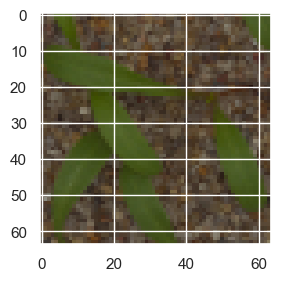

Correct Prediction:
- Actual Plant Type: Maize
- Predicted Plant Type: Maize


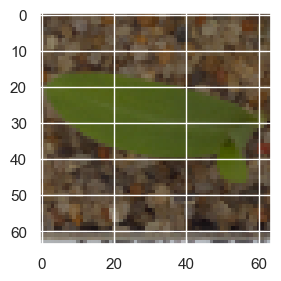

Correct Prediction:
- Actual Plant Type: Fat Hen
- Predicted Plant Type: Fat Hen


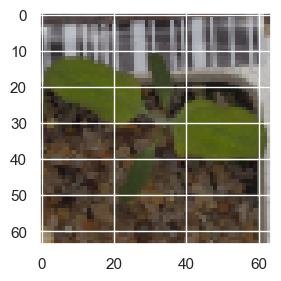

Wrong Prediction:
- Actual Plant Type: Sugar beet
- Predicted Plant Type: Scentless Mayweed


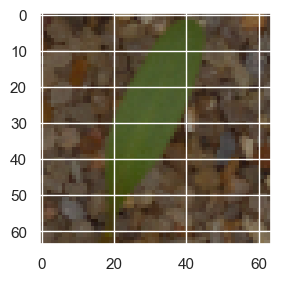

Wrong Prediction:
- Actual Plant Type: Maize
- Predicted Plant Type: Sugar beet


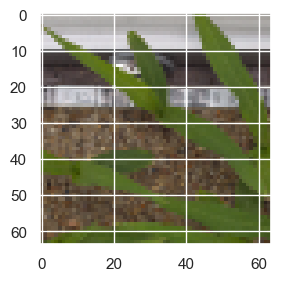

Wrong Prediction:
- Actual Plant Type: Cleavers
- Predicted Plant Type: Charlock


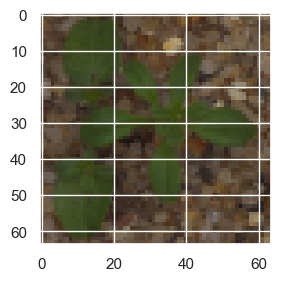

In [55]:
# Plotting Random 6 Images - 3 Images for Correct and 3 Images for Wrong Predictions using model_2:

predict_correct_random = np.random.choice(model_2_correct , size=3 , replace=False)
predict_wrong_random = np.random.choice(model_2_wrong , size=3 , replace=False)

predict_random = np.concatenate((predict_correct_random , predict_wrong_random))

for i in predict_random:
    actual_label = label_binarizer.inverse_transform(y_test_encoded)[i]
    predicted_label = ''.join(label_binarizer.inverse_transform(model_2.predict(X_test_normalized[i].reshape(1,64,64,3))))
    
    if actual_label == predicted_label:
        print('\033[1m' , '\033[92m' , 'Correct Prediction:' , sep = '')
    
    elif actual_label != predicted_label:
        print('\033[1m' , '\033[91m' , 'Wrong Prediction:' , sep = '')
        
    print('\033[0m' , '\033[93m' , '- Actual Plant Type: ', 
          '\033[0m' , '\033[94m' , actual_label , sep = '')
    print('\033[0m' , '\033[93m' , '- Predicted Plant Type: ', 
          '\033[0m' , '\033[94m' ,predicted_label , sep = '')
    plt.figure(figsize=(3,3))
    plt.imshow(X_test[i])
    plt.show();  

In [56]:
# Summarizing the Predictions using model_2:

for label in y_test.iloc[:, 0].unique():
    correct_class = len(np.where((y_test['Label'] == label) & (y_test_array == y_result_2_final))[0])
    wrong_class = len(np.where((y_test['Label'] == label) & (y_test_array != y_result_2_final))[0])
    sample_size = correct_class + wrong_class

    print('\033[0m' , '\033[93m' , 'Plant Type: ' , 
          '\033[1m' , '\033[94m' , f'{label:<30}' ,
          '\033[0m' , '\033[93m' , 'Sample Size: ' , 
          '\033[1m' , '\033[94m' , sample_size ,
          '\033[0m' , '\033[93m' , '\tClassified Correctly: ' , 
          '\033[1m' , '\033[92m' , correct_class ,
          '\033[0m' , '\033[93m' , '\tClassified Wrongly: ' , 
          '\033[1m' , '\033[91m' , wrong_class , sep = '')

Plant Type: Small-flowered Cranesbill     Sample Size: 50	Classified Correctly: 46	Classified Wrongly: 4
Plant Type: Fat Hen                       Sample Size: 48	Classified Correctly: 45	Classified Wrongly: 3
Plant Type: Sugar beet                    Sample Size: 38	Classified Correctly: 31	Classified Wrongly: 7
Plant Type: Loose Silky-bent              Sample Size: 65	Classified Correctly: 54	Classified Wrongly: 11
Plant Type: Scentless Mayweed             Sample Size: 52	Classified Correctly: 49	Classified Wrongly: 3
Plant Type: Black-grass                   Sample Size: 26	Classified Correctly: 14	Classified Wrongly: 12
Plant Type: Cleavers                      Sample Size: 29	Classified Correctly: 25	Classified Wrongly: 4
Plant Type: Maize                         Sample Size: 22	Classified Correctly: 21	Classified Wrongly: 1
Plant Type: Common Chickweed              Sample Size: 61	Classified Correctly: 55	Classified Wrongly: 6
Plant Type: Shepherds Purse               Sample Size

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations**
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** While some plant types like Maize and Charlock have been classified with very small errors, other plants like Loose Silky-bent and Black-grass have been classified with relatively high errors.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **7. Business Recommendations:**

<left> <font size=3 style='font-family:Courier New' color='Black'> **Initially**, it's important to list the deficiencies and weakness points in provided dataset before moving into recommendations:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** No. of samples/images per class is not large enough.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Classes suffer from imbalance (Minor effect since similarity between shapes has been proven to have greater impact than imbalance).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Low quality Images like blurred and non-expressive.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Images have low resolution.
 <br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Some images do not show the fully grown structure of the plant.
 <br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Some plants have been misclassified in spite of its large representation.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** High noise due to different and unnecessary backgrounds.

<left> <font size=3 style='font-family:Courier New' color='Black'> **Accordingly**, below recommendations would be fruitful in order to have a robust, more generalarized, and distinguished model:
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Since the no. of classes is somehow large (12 Classes), an increase in the no. of samples per class would have a great impact by allowing the model to expose to larger and more diversed training data. Consequently, a better accuracy might be achieved.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Increasing the no. of images for minority classes (Ex.: Common wheat, Maize, Shepherds Purse, etc.) is a must to have a balanced dataset that results in non-biased classsificaton towards the majority classes.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Due to the fact that the same plant type may have different shapes and sizes in different age stages, images must be taken carefully to reflect such fact. Thus, the model will be able to recognize different scenarios once deployed.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Investigating the current dataset is recommended to exclude the low quality and highly blurred images and replace them with well expressive images while keeping the balance unchanged.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Despite of low resolution Images have a great advantage in reducing the required computational resources, such low resolution has side effects by not allowing the model to capture the most fine details. Hence, any increase in the resolution will be positively reflected in model's accuracy.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** In addition to the above point, some plant types look similar in nature, they might share similar leaves shapes. Thus, low resolution and blurred images will greatly impact the model capability to understand and learn such similarity and downgrade its classification capability.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Images must be well expressive by displaying the fully grown plant instead of partial viewing of only stems or leaves; Model must be able to recognize as much details as possible to classify the plants accoringly.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** In addition to displaying the fully grown plant in single images, side views might have great impact in capturing more fine details and increasing the capability of classifying similar plants.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Different images background add noice and increase the difficulty to capture the meaningful details; Hence, having images with either soil or gravels in the background would incredibly help the model to learn, classify and generalarize accordingly.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** However, it's fair to say that classifying 12 different type of plants at once, with expected similarity in shapes among them, in addition to different shapes/sizes per each plant while proceeding in age is quite complex and not easy task.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Although the balanced classes are almost always the corner stone in achieving models with good performance; some plant types (Ex.: Loose Silky-bent) suffer from high rate of mis-classification inspite of its large representation. Referring to previous recommendations, it has been proofed during the analysis that both Loose Silky-bent and Black grass are similar to each other in shapes.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** The above point enhances the hypothesis of bad impact on classification due to similarity; Thus, adding more expresive, diverse, meaningful images for such types of plants may reduce the error rate and help the model distinguish between them easily and efficiently.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Overall, Diverse and large images size per each class, balancing between classes, high quality images with low noise will work together in a positive manner to acheive robust, more accurate, and more generalarization model.

<left> <font size=3 style='font-family:Courier New' color='Black'> **Finally**, given the dataset as it's, we were able to build an improved cnn model 'model_2' using data augmentation, such model is: 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Able to classifying the 12 different species of plants with an accuracy equals to around 86% on unseen data/testing data.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** In addition to accuracy, it works well on Recall, Precision, and F1-Score with values ranging from 86% to 87%.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Has succeeded in correctly classifying 411 images out of 475.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Relatively not expensive as it took around 368 seconds to train.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> **-** Eventually, applying the above recommendations will greatly help the model to achieve higher rate of accuracy and reduce the error rate (mis-classifications) espicially for classes that suffer from high error rates.